Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Set display option to show all columns 
pd.set_option("display.max_columns", None)


# Load the Dataset 
df = pd.read_csv(r"House Price Prediction Dataset.csv")

# Quick Peek at the dataset

In [7]:
# Drop the 'Id' column as it's not useful for analysis
df.drop('Id', axis=1, inplace=True)    

# Display the first few rows of the dataframe
print(df.head())

# Get information about the dataframe
info = df.info()
print(info)

# Check for missing values in the dataset
print(df.isnull().sum())

# Get Statistical summary of numeric columns
describe = df.describe().T
print(describe)

   Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition Garage  \
0  1360         5          4       3       1970  Downtown  Excellent     No   
1  4272         5          4       3       1958  Downtown  Excellent     No   
2  3592         2          2       3       1938  Downtown       Good     No   
3   966         4          2       2       1902  Suburban       Fair    Yes   
4  4926         1          4       2       1975  Downtown       Fair    Yes   

    Price  
0  149919  
1  424998  
2  266746  
3  244020  
4  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   obj

Visualizing Data

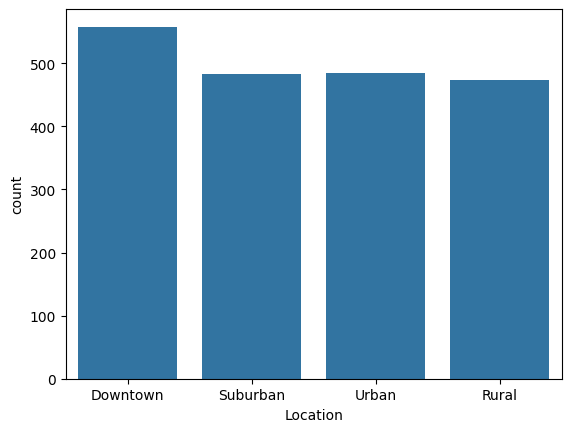

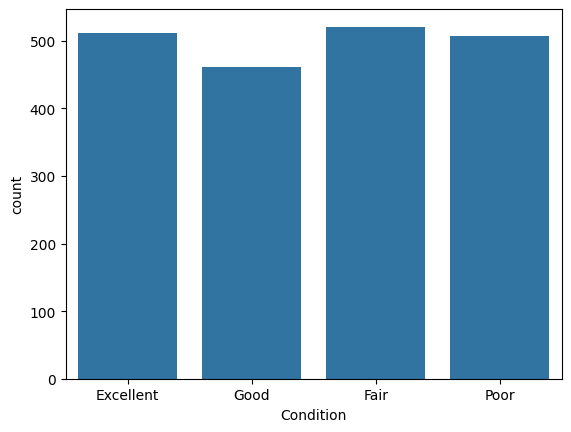

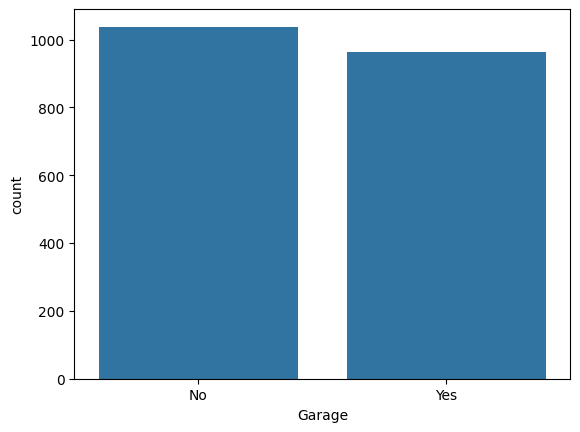

In [8]:
for col in df:
    if df[col].dtype == 'object':  # If the column is categorical
        sns.countplot(data=df, x=col)  # Count plot for categorical variables
        plt.show()  # Show the plot

Finding Outliers

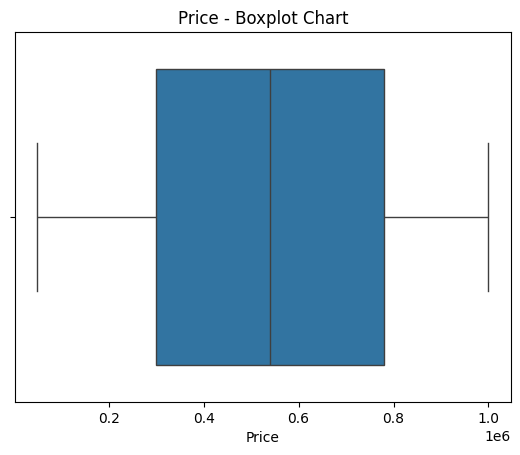

Outliers - Z-Score:
 Empty DataFrame
Columns: [Area, Price, YearBuilt]
Index: []


In [9]:
# Boxplot for 'Price'
sns.boxplot(data=df, x='Price')       
plt.title('Price - Boxplot Chart')
plt.show()

# Z-score Calculation
df_num = df[['Area', 'Price', 'YearBuilt']]  # Select numeric columns for Z-score analysis

# Z-score Calculation
z_scores = np.abs(stats.zscore(df_num))  # Calculate the Z-scores

# Finding outliers based on specified threshold
threshold = 2.57
outliers_zscore = df_num[(z_scores > threshold).any(axis=1)]  # Identify outliers
print("Outliers - Z-Score:\n", outliers_zscore)
# Dataset hasn't outliers


Feature Engineering

In [10]:
location_avg_price = df.groupby('Location')['Price'].transform('mean')
df['Location_ratio'] = df['Price'] / location_avg_price  # Calculate location price ratio

print(df[['Location', 'Price', 'Location_ratio']])  # Display the relevant columns

# Function for encoding features
def encoding_features(dataframe):
    condition_mapping = {'Excellent': 1, 'Fair': 2, 'Good': 3, 'Poor': 4}
    location_mapping = {'Downtown': 1, 'Rural': 2, 'Suburban': 3, 'Urban': 4}
    dataframe = dataframe.copy()
    dataframe['ConditionEncoding'] = dataframe['Condition'].map(condition_mapping)  # Encode condition
    dataframe['LocationalEncoding'] = dataframe['Location'].map(location_mapping)  # Encode location
    
    return dataframe

df = encoding_features(df)  # Apply encoding function

# Convert Yes/No values to 1/0 for Garage feature
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})

print(df['Garage'].head())  # Display the first few values of the Garage column

      Location   Price  Location_ratio
0     Downtown  149919        0.279668
1     Downtown  424998        0.792818
2     Downtown  266746        0.497605
3     Suburban  244020        0.437770
4     Downtown  636056        1.186540
...        ...     ...             ...
1995  Suburban  295620        0.530340
1996  Suburban  580929        1.042182
1997     Rural  476925        0.885467
1998     Urban  161119        0.310463
1999  Suburban  482525        0.865646

[2000 rows x 3 columns]
0    0
1    0
2    0
3    1
4    1
Name: Garage, dtype: int64


Modeling
1. Linear Regression

In [11]:
# Evaluate results using Linear Regression
x = df.drop(['Price', 'Condition', 'Location'], axis=1)  # Features
y = df['Price']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()  # Initialize Linear Regression model
lr.fit(x_train, y_train)  # Fit the model to training data

y_pred = lr.predict(x_test)  # Make predictions on the test data

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)

print('Linear Regression Score')
print('----------------------')
print(f'R2 Score: {r2}')  # Print R2 Score
print(f'Mean Absolute Error: {msa}')  # Print Mean Absolute Error

# Regression coefficients
coefficients = lr.coef_
print(f"Regression Coefficients: {coefficients}")  # Display regression coefficients

Linear Regression Score
----------------------
R2 Score: 0.9968189524850175
Mean Absolute Error: 11423.9817228156
Regression Coefficients: [-1.86618091e-01  2.79235278e+01 -3.75951662e+02 -5.07961071e+02
  7.19990862e+00  6.59609935e+02  5.35778331e+05 -1.88502554e+02
 -3.23840808e+03]


Predict using RandomForestRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=25, random_state=42)  # Initialize Random Forest model
rf.fit(x_train, y_train)  # Fit the model to training data

y_pred_rf = rf.predict(x_test)  # Make predictions on the test data

# Calculate evaluation metrics for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
msa_rf = mean_absolute_error(y_test, y_pred_rf)

print('Random Forest Regressor Score')
print('----------------------')
print(f'R2 Score: {r2_rf}')  # Print R2 Score
print(f'Mean Absolute Error: {msa_rf}')  # Print Mean Absolute Error

Random Forest Regressor Score
----------------------
R2 Score: 0.9997813676150805
Mean Absolute Error: 2888.0564000000036
